Importing libaries

In [49]:

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,f1_score 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  # SVM model
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler 

import warnings
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
warnings.filterwarnings("ignore")

Load and Explore the Dataset

In [50]:

file_path =  r"D:\ML-Project\ML-Project\stroke-prediction-dataset\healthcare-dataset-stroke-data.csv"
data = pd.read_csv(file_path)
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [51]:
# Displaying total number of rows and columns in the entire dataset
data.shape 

(5110, 12)

In [52]:
#Display the first few rows of dataset
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [53]:
# Checking if there are null values in the dataset and the sum of the null values if found for all the attributes; if there were null values they would have been deleted
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [54]:
# This line fills any missing (NaN) values in the 'bmi' column with the median value of the 'bmi' column
# The median is chosen as it is more robust to outliers compared to the mean, providing a better representation
# of the central value in cases where outliers might skew the mean.
data['bmi'] = data['bmi'].fillna(data['bmi'].median())
# Display the first 5 rows of the data to check the updates
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [55]:
#Check again of nulls value 
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [56]:
# Drop 'id' column
data.drop('id', axis=1, inplace=True)

In [57]:
# print dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [58]:
data['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

data visualization 

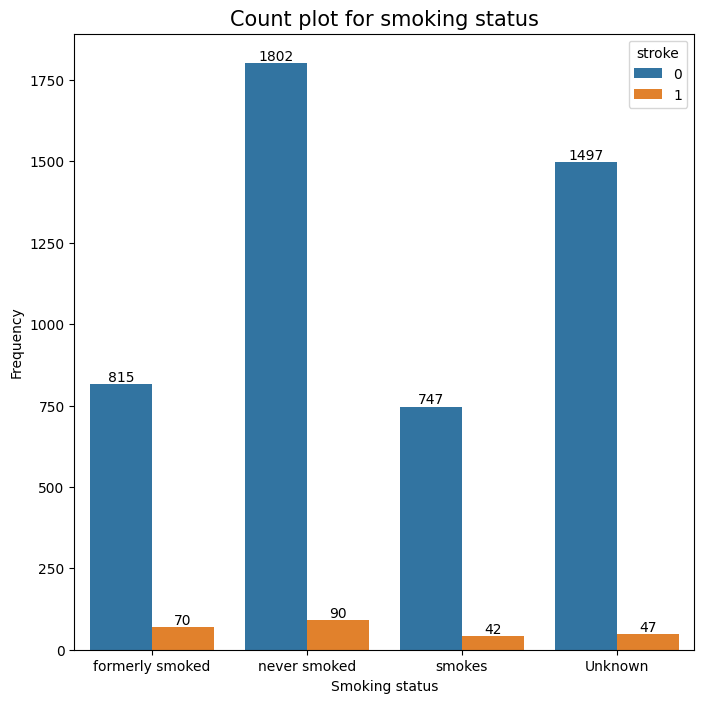

In [59]:
# Create the count or bar plot for smoking_status
plt.figure(figsize=(8, 8)) 
ax = sns.countplot(x='smoking_status', hue='stroke',data=data)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Smoking status')
plt.ylabel('Frequency')
plt.title('Count plot for smoking status', fontsize=15)
# Show the plot
plt.show()

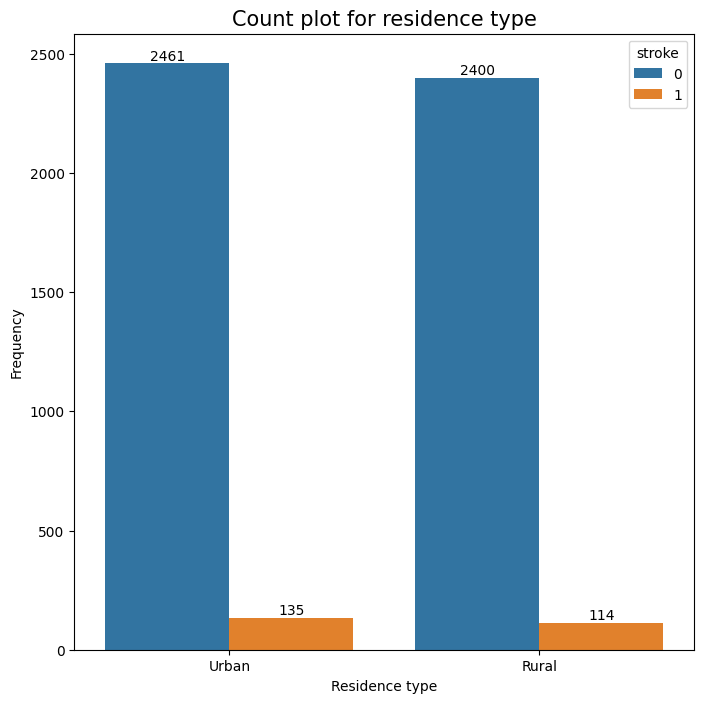

In [60]:
# Create the count or bar plot for Residence_type
plt.figure(figsize=(8, 8)) 
ax = sns.countplot(x='Residence_type', hue='stroke',data=data)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Residence type')
plt.ylabel('Frequency')
plt.title('Count plot for residence type', fontsize=15)
# Show the plot
plt.show()

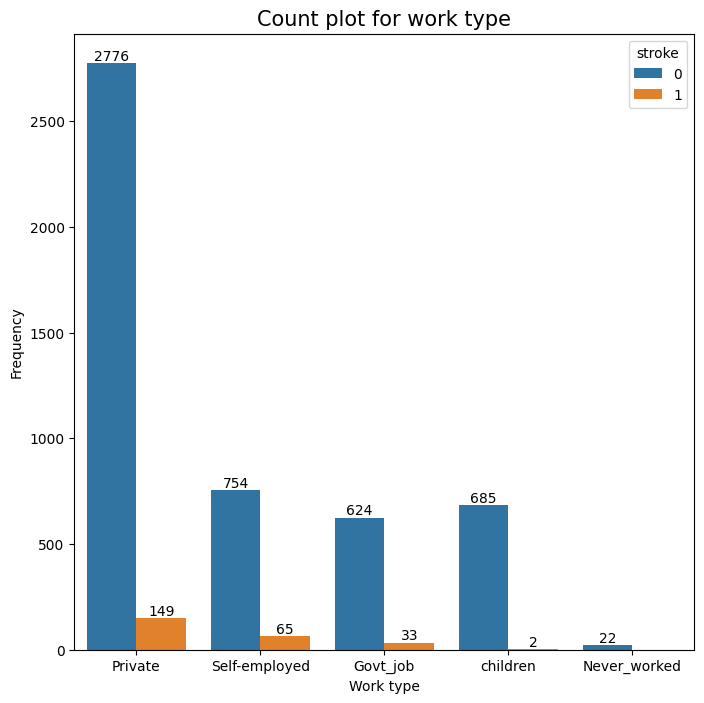

In [61]:
# Create the count or bar plot for work_type
plt.figure(figsize=(8, 8))  
ax = sns.countplot(x='work_type', hue='stroke',data=data)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Work type')
plt.ylabel('Frequency')
plt.title('Count plot for work type', fontsize=15)
# Show the plot
plt.show()

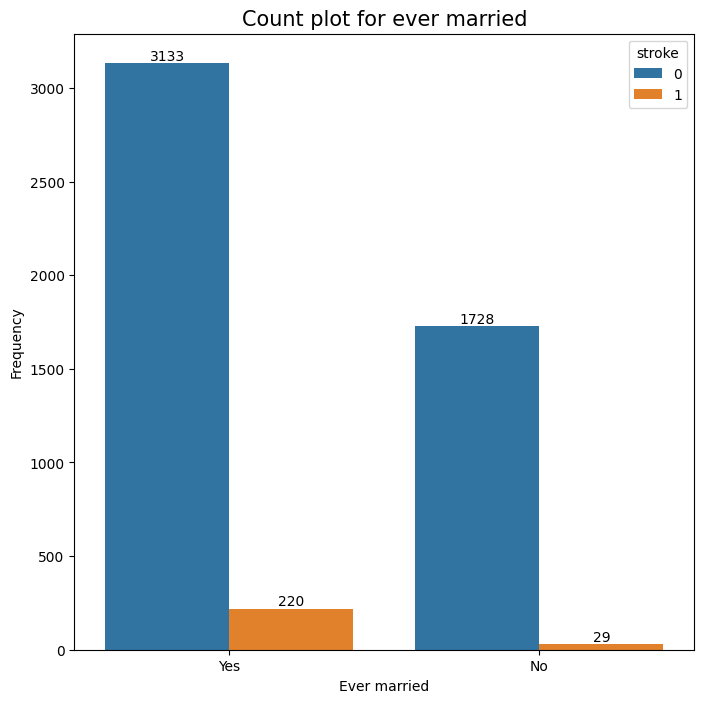

In [62]:
# Create the count or bar plot for ever_married 
plt.figure(figsize=(8,8)) 
ax = sns.countplot(x='ever_married', hue='stroke',data=data)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Ever married')
plt.ylabel('Frequency')
plt.title('Count plot for ever married', fontsize=15)
# Show the plot
plt.show()

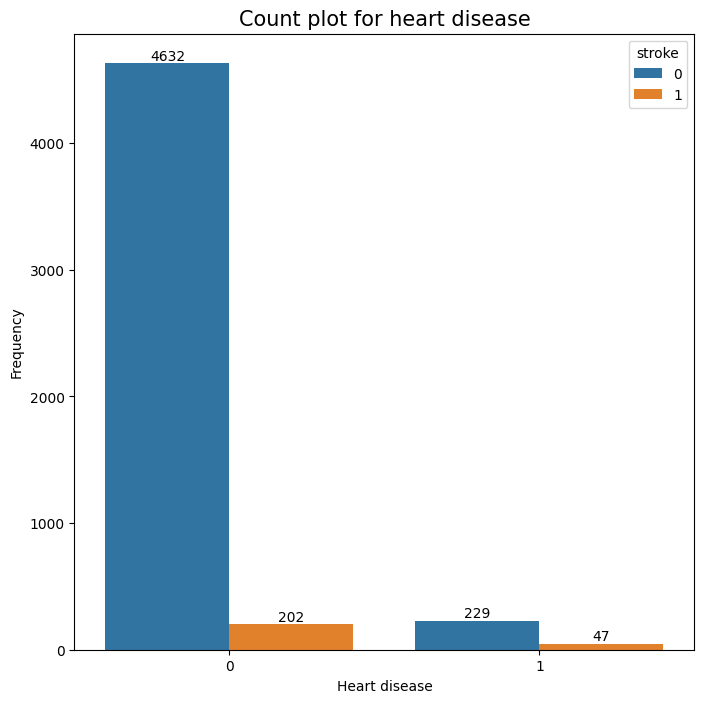

In [63]:
# Create the count or bar plot for heart_disease
plt.figure(figsize=(8, 8)) 
ax = sns.countplot(x='heart_disease', hue='stroke',data=data)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Heart disease')
plt.ylabel('Frequency')
plt.title('Count plot for heart disease', fontsize=15)
# Show the plot
plt.show()

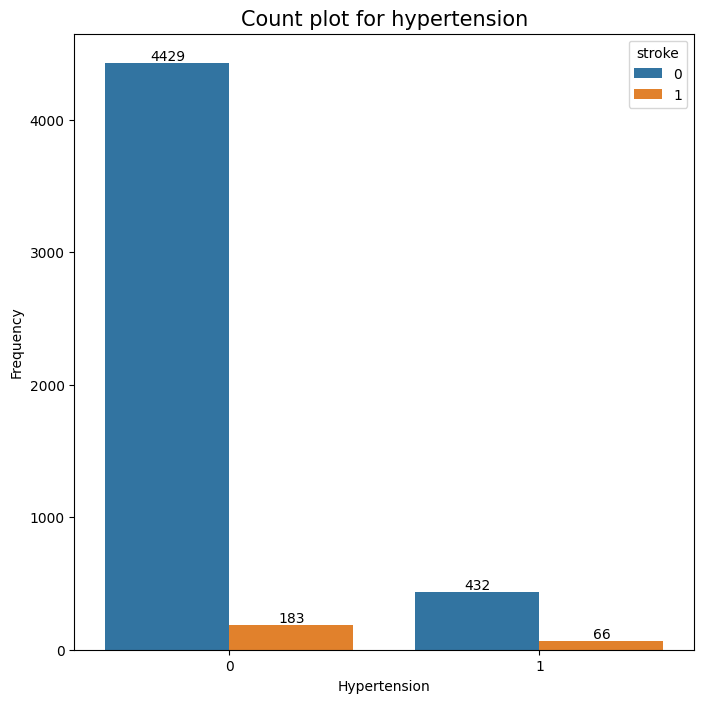

In [64]:
# Create the count or bar plot for hypertension
plt.figure(figsize=(8, 8))
ax = sns.countplot(x='hypertension', hue='stroke',data=data)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Hypertension')
plt.ylabel('Frequency')
plt.title('Count plot for hypertension', fontsize=15)
# Show the plot
plt.show()

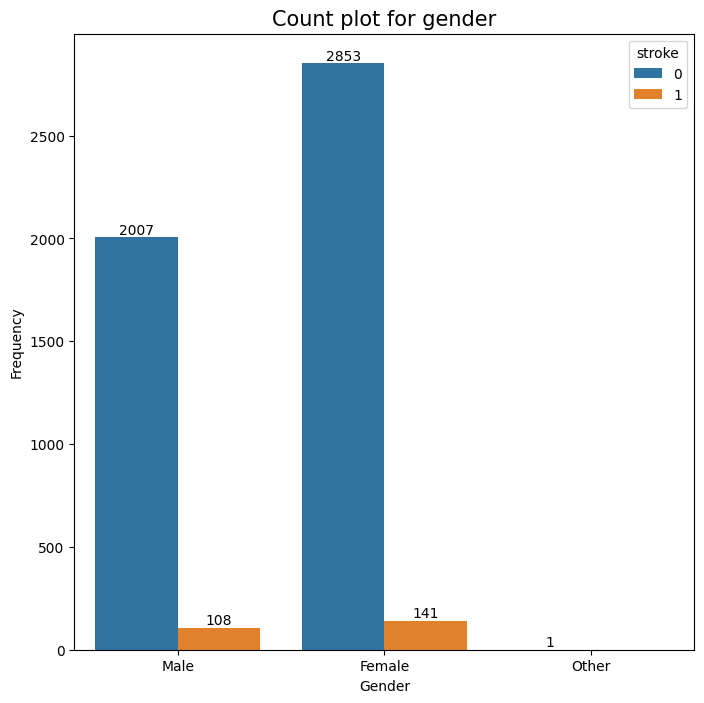

In [65]:
# Create the count or bar plot for gender 
plt.figure(figsize=(8, 8)) 
ax = sns.countplot(x='gender', hue='stroke',data=data)
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Count plot for gender', fontsize=15)
# Show the plot
plt.show()

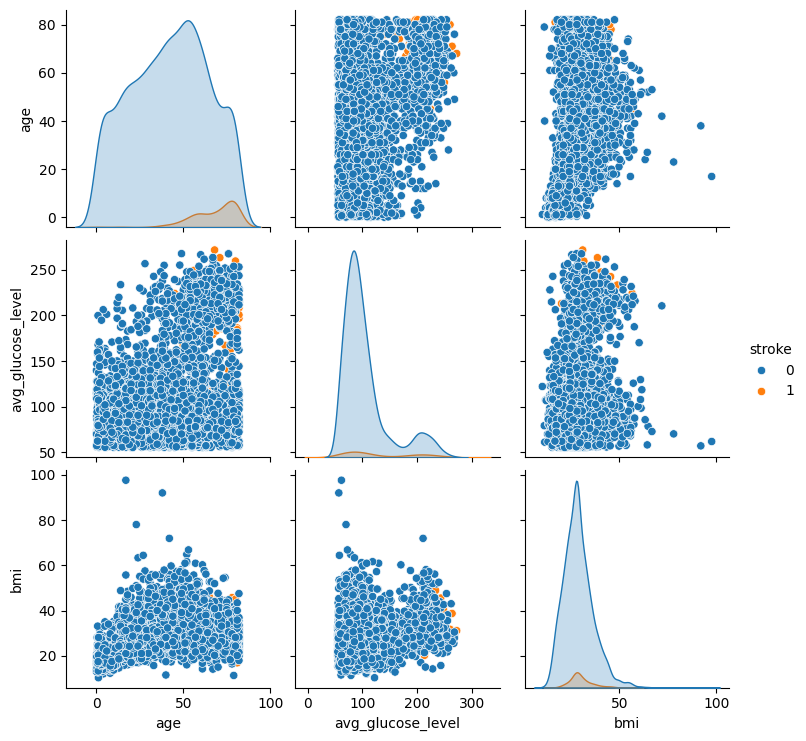

In [66]:
# Create a pairplot for selected variables with hue based on the 'stroke' category
sns.pairplot(data,vars = ['age','avg_glucose_level','bmi'],hue='stroke')
plt.show()

In [67]:
# Encode categorical variables
label_encoders = {}
for column in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [68]:
# Define feature variables (X) and target variable (y)
X = data.drop('stroke', axis=1)
y = data['stroke']

In [69]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(4088, 10)
(1022, 10)


In [70]:
# Print the number of instances in the training and testing sets
print(f"Number of instances in the training set: {X_train.shape[0]}")
print(f"Number of instances in the testing set: {X_test.shape[0]}")

Number of instances in the training set: 4088
Number of instances in the testing set: 1022


# Decision tree

In [71]:
# Fit a normal decision tree without any fine tuning and check the results
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)


In [72]:
# Predict and compute accuracy before pre-pruning
y_test_pred_before = clf.predict(X_test)
accuracy_before = accuracy_score(y_test, y_test_pred_before)
print(f"Accuracy Before Pre-Pruning: {accuracy_before:.2f}")

Accuracy Before Pre-Pruning: 0.91


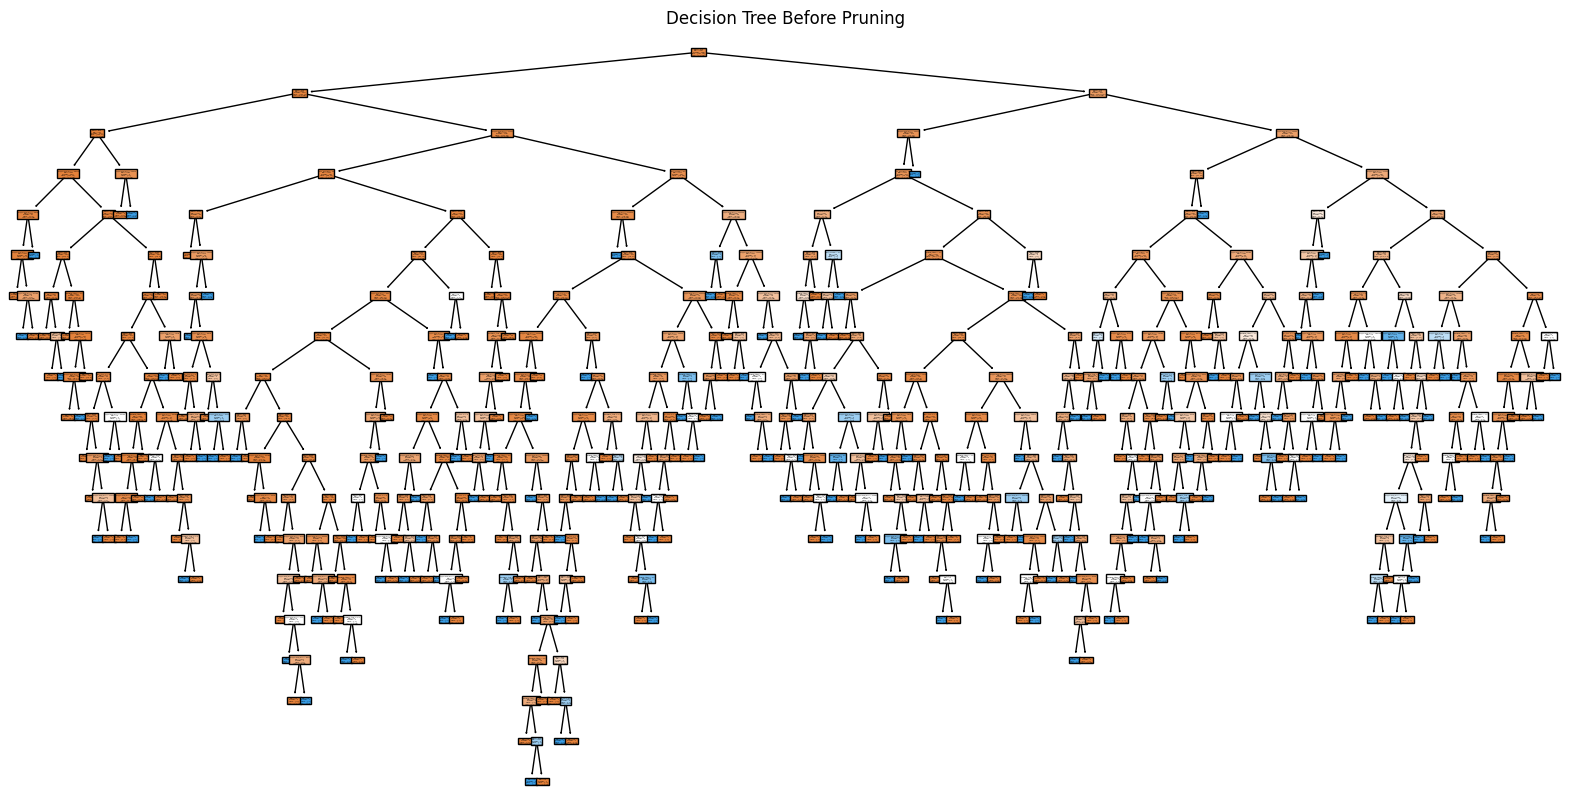

In [73]:
# Visualize the Decision Tree before pruning
plt.figure(figsize=(20, 10))
classes=['No Stroke', 'Stroke']
plot_tree(clf, feature_names=X.columns, class_names=classes, filled=True)
plt.title("Decision Tree Before Pruning")
plt.show()

In [74]:
# helper function
def plot_confusionmatrix(y_true, y_pred, dom='Train'):
    print(f'{dom} Confusion Matrix')
    cf = confusion_matrix(y_true, y_pred)  # Correct arguments: y_true and y_pred
    sns.heatmap(cf, annot=True, yticklabels=['No Stroke', 'Stroke'], 
                xticklabels=['No Stroke', 'Stroke'], cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix ({dom} Set)')
    plt.tight_layout()
    plt.show()

Train Score: 1.00
Test Score: 0.91
Train Confusion Matrix


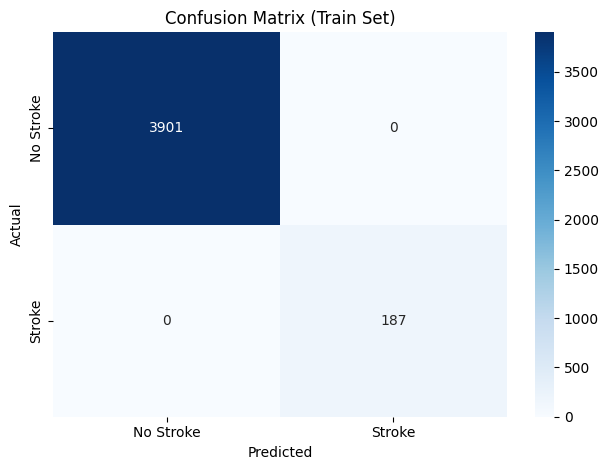

Test Confusion Matrix


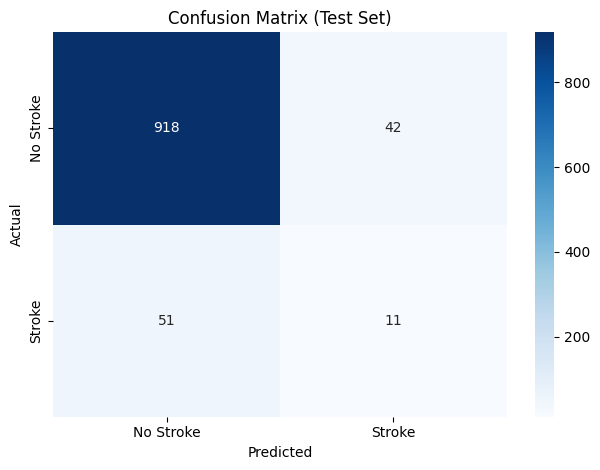

In [75]:
# print the accracy score dor train and test
print(f'Train Score: {accuracy_score(y_train, y_train_pred):.2f}')
print(f'Test Score: {accuracy_score(y_test, y_test_pred):.2f}')
plot_confusionmatrix(y_train, y_train_pred, dom='Train')
plot_confusionmatrix(y_test, y_test_pred, dom='Test')

Decision Tree after pre-pruning

In [76]:
# Define hyperparameters for tuning the Decision Tree model
params = {'max_depth': [2,4,6,8,10,12],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [1,2]}
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()
# Set up GridSearchCV to search for the best combination of hyperparameters
gcv = GridSearchCV(estimator=clf,param_grid=params)
# Fit the GridSearchCV to the training data to find the best hyperparameters
gcv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

Train score 0.9542563600782779
Test score 0.9393346379647749
Train Confusion Matrix


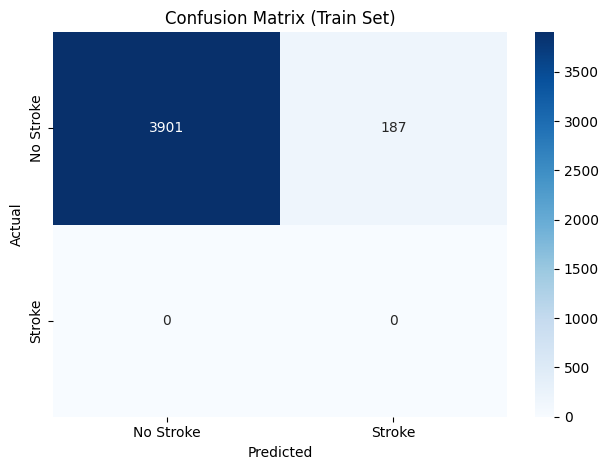

Test Confusion Matrix


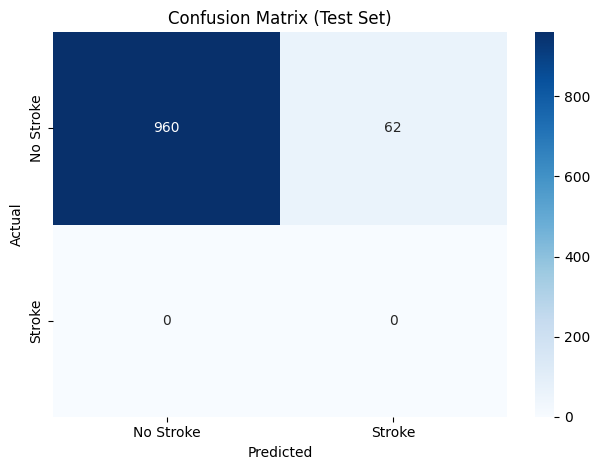

In [77]:
# Retrieve the best model (estimator) found by GridSearchCV
model = gcv.best_estimator_ # Fit the best model on the training data
model.fit(X_train,y_train) 
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred,y_train)}')
print(f'Test score {accuracy_score(y_test_pred,y_test)}')
plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

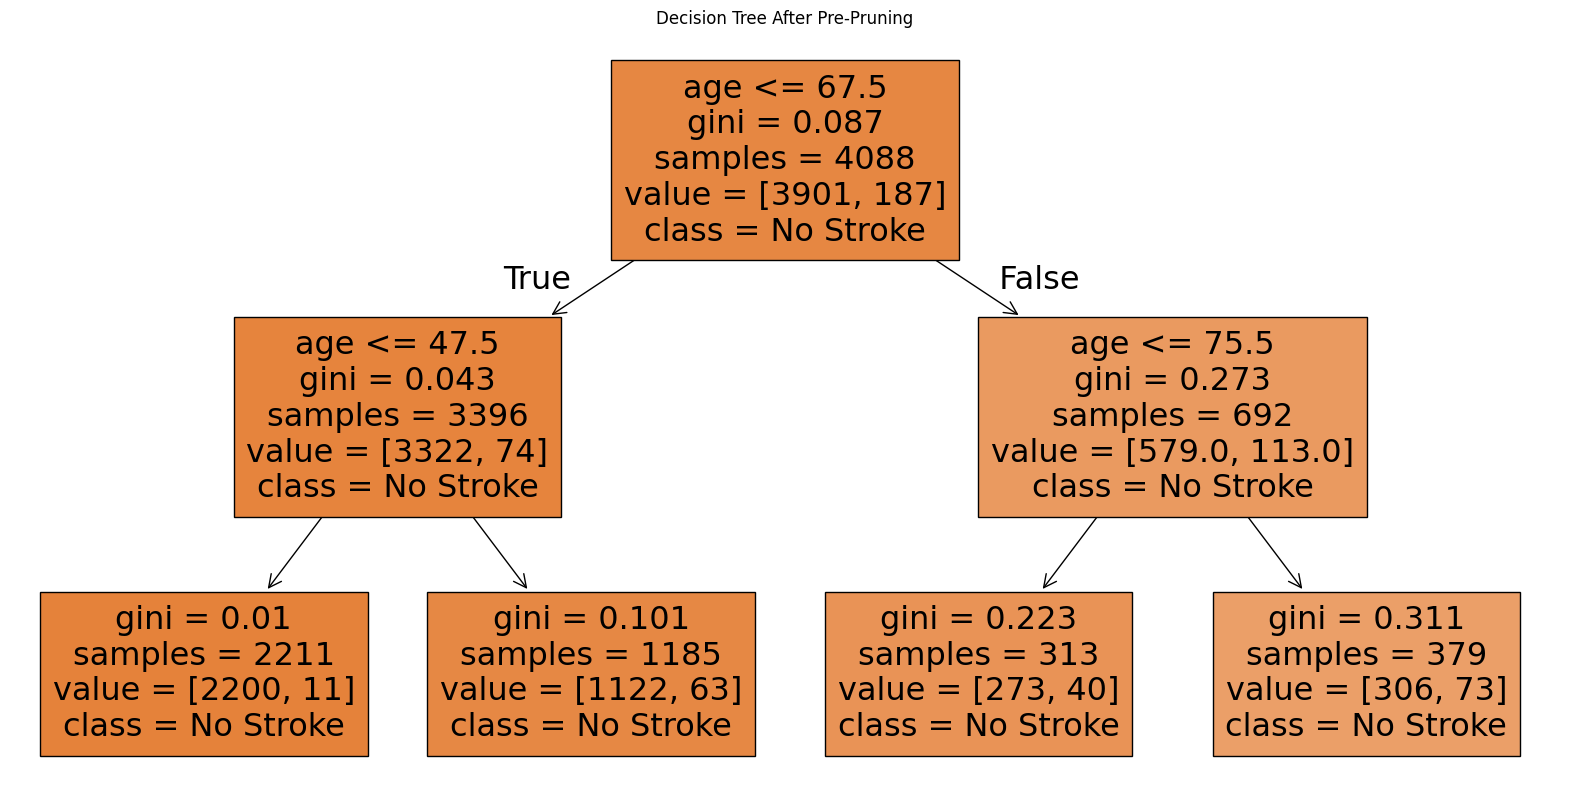

In [78]:
# Visualize the Decision Tree after pre-pruning
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['No Stroke', 'Stroke'], filled=True)
plt.title("Decision Tree After Pre-Pruning")
plt.show()

In [79]:
# Predict on the test set using the pre-pruned model
y_pred = model.predict(X_test)

In [80]:
# Evaluate the pre-pruned model
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[960   0]
 [ 62   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022


Accuracy Score: 0.9393346379647749


KNN

In [81]:
# Encode categorical variables
for column in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])

In [82]:
# Normalize the feature data using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
X = pd.DataFrame(X_normalized, columns=X.columns)

In [83]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# Function to train and evaluate KNN model
def train_and_evaluate_knn(X_train, y_train, X_test, y_test, use_adasyn=False):
    if use_adasyn:
        print("\nApplying ADASYN...")
        adasyn = ADASYN(random_state=42)
        X_train, y_train = adasyn.fit_resample(X_train, y_train)
        print("Class distribution after ADASYN:\n", pd.Series(y_train).value_counts())
    else:
        print("\nTraining without ADASYN...")

    # Initialize KNN with class weights
    knn = KNeighborsClassifier(weights='distance')

    # Define hyperparameter grid for KNN
    param_grid_knn = {
        'n_neighbors': [3, 5, 7, 9, 11],
        'metric': ['minkowski', 'euclidean', 'manhattan']
    }

    # Use Stratified K-Fold Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Grid search for best KNN parameters
    grid_search_knn = GridSearchCV(knn, param_grid_knn, scoring='f1_weighted', cv=skf, n_jobs=-1, verbose=1)
    grid_search_knn.fit(X_train, y_train)

    # Get the best parameters and estimator
    print("Best KNN Parameters:", grid_search_knn.best_params_)
    best_knn = grid_search_knn.best_estimator_

    # Train the best KNN model
    best_knn.fit(X_train, y_train)

    # Predict on the test set
    y_pred_knn = best_knn.predict(X_test)

    # Evaluate the KNN model performance
    def evaluate_model(name, yt, yp):
        print(f"\n{name} Classification Report:\n", classification_report(yt, yp))
        cm = confusion_matrix(yt, yp)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Not Stroke', 'Stroke'], yticklabels=['Not Stroke', 'Stroke'])
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'{name} Confusion Matrix')
        plt.show()

    # Evaluate the model
    evaluate_model('KNN (With ADASYN)' if use_adasyn else 'KNN (Without ADASYN)', y_test, y_pred_knn)

    # Return the classification report as a DataFrame
    return pd.DataFrame(classification_report(y_test, y_pred_knn, output_dict=True)).transpose()

KNN without ADASYN


Training without ADASYN...
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 5}

KNN (Without ADASYN) Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97       960
           1       0.22      0.03      0.06        62

    accuracy                           0.93      1022
   macro avg       0.58      0.51      0.51      1022
weighted avg       0.90      0.93      0.91      1022



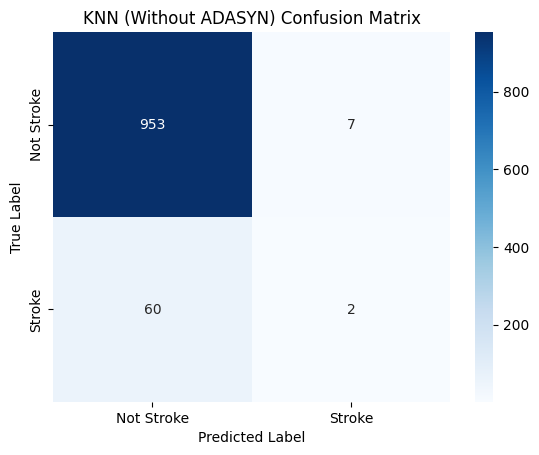

In [37]:
# Train and evaluate KNN without ADASYN
report_before_adasyn = train_and_evaluate_knn(X_train, y_train, X_test, y_test, use_adasyn=False)

KNN with ADASYN


Applying ADASYN...
Class distribution after ADASYN:
 stroke
1    3903
0    3901
Name: count, dtype: int64
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 3}

KNN (With ADASYN) Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93       960
           1       0.13      0.21      0.16        62

    accuracy                           0.87      1022
   macro avg       0.54      0.56      0.55      1022
weighted avg       0.90      0.87      0.88      1022



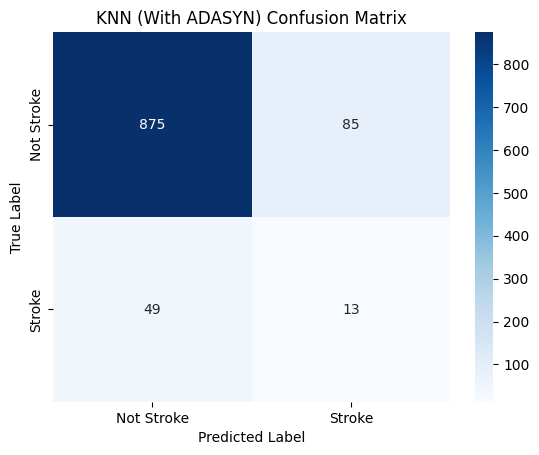

In [38]:
# Train and evaluate KNN with ADASYN
report_after_adasyn = train_and_evaluate_knn(X_train, y_train, X_test, y_test, use_adasyn=True)

In [39]:
# Combine the reports for comparison
comparison_report = pd.concat([report_before_adasyn, report_after_adasyn], axis=1, keys=['Before ADASYN', 'After ADASYN'])

In [40]:
# Display the comparison report
print("\nComparison of KNN Performance Before and After ADASYN:")
print(comparison_report)



Comparison of KNN Performance Before and After ADASYN:
             Before ADASYN                                  After ADASYN  \
                 precision    recall  f1-score      support    precision   
0                 0.940770  0.992708  0.966042   960.000000     0.946970   
1                 0.222222  0.032258  0.056338    62.000000     0.132653   
accuracy          0.934442  0.934442  0.934442     0.934442     0.868885   
macro avg         0.581496  0.512483  0.511190  1022.000000     0.539811   
weighted avg      0.897179  0.934442  0.910854  1022.000000     0.897569   

                                               
                recall  f1-score      support  
0             0.911458  0.928875   960.000000  
1             0.209677  0.162500    62.000000  
accuracy      0.868885  0.868885     0.868885  
macro avg     0.560568  0.545687  1022.000000  
weighted avg  0.868885  0.882382  1022.000000  


3. SVM Model

In [41]:
# Standardize the features (important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
#Build and train the SVM model
# Create an instance of the SVC (Support Vector Classifier)
svm_model = SVC(kernel='linear')

Step 1: Impute missing values in X_train to start the traning

In [43]:

imputer = SimpleImputer(strategy='mean')  
X_train_imputed = imputer.fit_transform(X_train)

Step 2: Apply SMOTE to handle imbalance between class .

In [44]:

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_imputed, y_train)

Step 3: Train the model on the resampled dataset

In [45]:

svm_model.fit(X_train_resampled, y_train_resampled)

SVC(kernel='linear')

Step 4: Handle missing values in X_test and make predictions

In [46]:

X_test_imputed = imputer.transform(X_test)  
y_pred = svm_model.predict(X_test_imputed)

Step 5: Evaluate the model

In [47]:

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

Print evaluation results

In [48]:

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 74.85%
Confusion Matrix:
[[718 242]
 [ 15  47]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       960
           1       0.16      0.76      0.27        62

    accuracy                           0.75      1022
   macro avg       0.57      0.75      0.56      1022
weighted avg       0.93      0.75      0.81      1022



Visualize the confusion matrix using seaborn

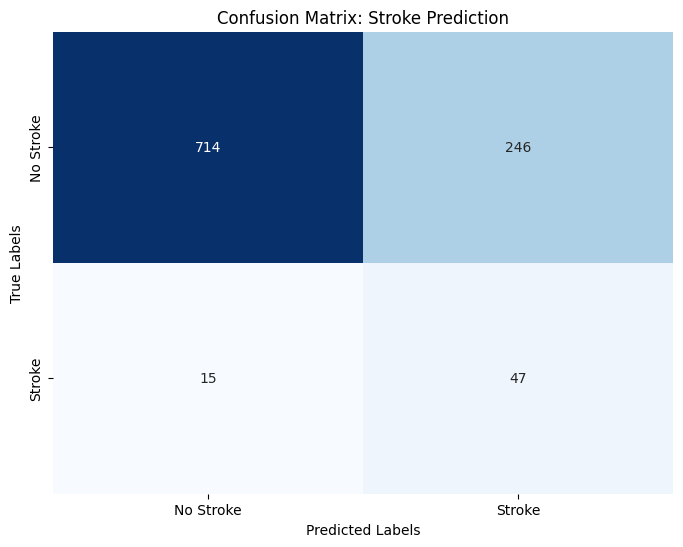

In [50]:

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Stroke', 'Stroke'], 
            yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix: Stroke Prediction')
plt.show()